In [9]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [11]:
def long_loop(arr2, verbose=True):
    '''
    Author: Team ℏ
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr,iters#Change made by Bachoti

def count_states(num,total_counts,return_dict = False,verbose=False):          #Change total_counts parameter to an error percentage later to make it independent of num
    '''
    Author: Team ℏ
    '''
    state_dict={}
    i=0
    num_iters = []#Change made by Bachoti
    num_iters_all = []#Change made by Bachoti
    oldarr,iters = long_loop(initialise_state(num), verbose=False)#Change made by Bachoti
    num_iters.append(iters)#Change made by Bachoti
    while True:
        if verbose:
            print(f"Iteration Number = {i} and Total states found = {len(state_dict)}", end="\r")
        newarr,iters = long_loop(oldarr,verbose=False)#Change made by Bachoti
        name =arr_to_string(newarr)
        num_iters_all.append(iters)#Change made by Bachoti
        
        if name not in state_dict:
            count_repetitions=0
            state_dict[name]=1
            num_iters.append(iters)#Change made by Bachoti
        else:
            count_repetitions+=1
            state_dict[name]+=1
        if count_repetitions==total_counts:
            break
        i+=1
        oldarr=newarr
    if return_dict:
        return len(state_dict),state_dict,num_iters,num_iters_all#Change made by Bachoti
    else:
        return len(state_dict),num_iters,num_iters_all#Change made by Bachoti

def print_acche_se(arr):
    for elem1 in arr:
        for elem2 in elem1:
            print(f"[{elem2[0]},{elem2[1]}]",end=",\t")
        print()
        print()

In [12]:

def get_all_column_translations(arr):
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[:,0:i].reshape(N,-1,2)
        a2 = arr[:,i:].reshape(N,-1,2)
        res = np.hstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

def get_all_row_translations(arr):
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[0:i,:].reshape(-1,N,2)
        a2 = arr[i:,:].reshape(-1,N,2)
        res = np.vstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

def arr_to_string(arr2):
    arr = copy.deepcopy(arr2)
    name = ' '.join(map(str, arr.flatten())).replace(' ','')
    return name

def string_to_arr(s):
    '''
    Author: Siddharth Chaini
    '''
    replaced_str = s.replace("-1","0")
    arr=[]
    for i in replaced_str:
        if i=='1':
            arr.append(1)
        elif i=="0":
            arr.append(-1)
        else:
            print("ERROR")
            assert(1==0)
    arr = np.array(arr)
    arr = arr.reshape(int(np.sqrt(len(arr)/2)),int(np.sqrt(len(arr)/2)),2)
    return arr

In [13]:
def remove_symmetries(all_names):
    '''
    Author: Team ℏ
    '''
    assert type(all_names)==list
    for i,given_name in enumerate(all_names):
#         print("*******************************")
#         print(f"Original Name = {given_name}")
        arr = string_to_arr(given_name)
        #Column Translation symmetries
        templist=get_all_column_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
#             print(f"Col Trans Name = {name}")
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Row Translation symmetries
        templist=get_all_row_translations(arr)
        for newarr in templist:
            name = arr_to_string(newarr)
#             print(f"Row Trans Name = {name}")
            if name in all_names[i+1:]:
                idx = all_names[i+1:].index(name) + i+1
                del all_names[idx]
                i = all_names.index(given_name)
        
        #Check 90 degree rotation symmetry
        name = arr_to_string(rot90_anticlock(arr))
#         print(f"Rot 90 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 180 degree rotation symmetry
        name = arr_to_string(rot180_anticlock(arr))
#         print(f"Rot 180 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check 270 degree rotation symmetry
        name = arr_to_string(rot270_anticlock(arr))
#         print(f"Rot 270 Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check horizontal flip symmetry
        name = arr_to_string(hor_flip(arr))
#         print(f"Flip Hor Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check vertical flip symmetry
        name = arr_to_string(ver_flip(arr))
#         print(f"Flip Ver Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check secondary diagonal flip symmetry
        name = arr_to_string(flip_secondary_diag(arr))
#         print(f"Sec Diag Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)

        #Check primary diagonal flip symmetry
        name = arr_to_string(flip_primary_diag(arr))
#         print(f"Prim Diag Name = {name}")
        if name in all_names[i+1:]:
            idx = all_names[i+1:].index(name) + i+1
            del all_names[idx]
            i = all_names.index(given_name)
    return all_names

# Secondary Diagonal

In [27]:
def plot_vector(p1,p2):
    '''
    Author: Siddharth Chaini
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    '''
    Author: Siddharth Chaini
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr):
    '''
    Author: Siddharth Chaini
    '''
    num = len(arr)
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

            plt.plot(x_current,y_current,'ob')

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1])
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current])

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current])
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current])

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1])
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current])

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current])
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current])
    plt.xlim(-1,num+1)
    plt.ylim(-1,num+1)
    plt.axis('off')
    plt.show()
    plt.close()

In [42]:

def state2to4(arr):
    fourstatearr=np.zeros((arr.shape[0],arr.shape[1],4))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            left_neighbour_right_state = arr[i][j-1][1]
            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            fourstatearr[i][j][0] = current_up_state
            fourstatearr[i][j][1] = current_right_state
            fourstatearr[i][j][2] = current_down_state
            fourstatearr[i][j][3] = current_left_state

    return fourstatearr

In [43]:
#Rot 270 anticlock
#Up becomes right, left becomes up, down becomes left, right becomes down
def rot270_anticlock(arr2):
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,3)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_left_state
            new_right_state = current_up_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr


In [44]:
#Rot 180 anticlock
#Up becomes down, left becomes right, down becomes up, right becomes left
def rot180_anticlock(arr2):
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,2)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_down_state
            new_right_state = current_left_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr

In [45]:
#Rot 90 anticlock
#Up becomes left, left becomes down, down becomes right, right becomes up
def rot90_anticlock(arr2):
    fourstatearr = state2to4(arr2)
    fourstatearr = np.rot90(fourstatearr,1)
    arr=np.zeros((fourstatearr.shape[0],fourstatearr.shape[1],2))
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            current_up_state = fourstatearr[i][j][0]
            current_right_state = fourstatearr[i][j][1]
            current_down_state = fourstatearr[i][j][2]
            current_left_state = fourstatearr[i][j][3]
            
            new_up_state = current_right_state
            new_right_state = current_down_state
            
            arr[i][j][0]=new_up_state
            arr[i][j][1]=new_right_state
    
    return arr

In [46]:
#secondary diagonal

def flip_secondary_diag_0(arr2):
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if (i+j)<N:
            #swapping Oxygen atoms
                dist = N-(i+j+1)
                arr[i][j], arr[i+dist][j+dist] = arr[i+dist][j+dist], arr[i][j]
                
            #swapping arrows of the atom
            arr[i][j][0], arr[i][j][1] = arr[i][j][1], arr[i][j][0]
    return arr

In [54]:
#Flip vertically
#Up becomes right, left becomes up, down becomes left, right becomes down
def ver_flip(arr2):
    '''
    Author: Siddharth Chaini
    '''
    arr = np.flip(arr2,0)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_down_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            
            upper_neighbour_down_state = arr[i-1][j][0]
            current_up_state = - (upper_neighbour_down_state)
            
            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr

In [55]:
#Flip horizontally
#Up becomes right, left becomes up, down becomes left, right becomes down
def hor_flip(arr2):
    '''
    Author: Siddharth Chaini
    '''
    arr = np.flip(arr2,1)
    proper_arr=np.zeros_like(arr2)
    num = len(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_left_state = arr[i][j][1]
            
            right_neighbour_left_state = arr[i][(j+1)%num][1]
            current_right_state = - (right_neighbour_left_state)

            proper_arr[i][j][0]=current_up_state
            proper_arr[i][j][1]=current_right_state
    return proper_arr

In [47]:
#primary diagonal

def flip_primary_diag_0(arr2):
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if i+j<2*i:
                arr[i][j][0], arr[i][j][1], arr[j][i-1][1], arr[(j+1)%N][i][0] =  -arr[j][i-1][1], -arr[(j+1)%N][i][0], -arr[i][j][0], -arr[i][j][1]
    return arr

In [48]:
#primary diagonal

def flip_primary_diag(arr2):
    arr = copy.deepcopy(arr2)
    N = len(arr)
    arr = rot90_anticlock(flip_secondary_diag(rot270_anticlock(arr)))
    return arr

In [49]:
#secondary diagonal

def flip_secondary_diag(arr2):
    arr = copy.deepcopy(arr2)
    N = len(arr)
    for i in range(N):
        for j in range(N):
            if (i+j)<=N-1:
                dist = N-(i+j+1)
                arr[i][j][0], arr[i+dist][j+dist][0], arr[i][j][1], arr[i+dist][j+dist][1] = arr[i+dist][j+dist][1], arr[i][j][1], arr[i+dist][j+dist][0], arr[i][j][0]
                
    return arr

In [73]:
def string_to_arr(s):
    replaced_str = s.replace("-1","0")
    arr=[]
    for i in replaced_str:
        if i=='1':
            arr.append(1)
        elif i=="0":
            arr.append(-1)
        else:
            print("ERROR")
            assert(1==0)
    arr = np.array(arr)
    arr = arr.reshape(int(np.sqrt(len(arr)/2)),int(np.sqrt(len(arr)/2)),2)
    return arr

In [50]:
#This corresponds to pic in book
arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
       [[-1,-1],[-1,-1],[-1,1],[1,-1]],
       [[-1,1],[-1,1],[1,1],[-1,1]],
       [[-1,1],[-1,1],[1,1],[-1,1]]]
arr = np.array(arr)

In [51]:
l12 = np.array([[[-1,  1],
        [ 1,  1],
        [ 1,  1]],

       [[-1, -1],
        [ 1, -1],
        [ 1, -1]],

       [[-1,  1],
        [ 1,  1],
        [ 1,  1]]])

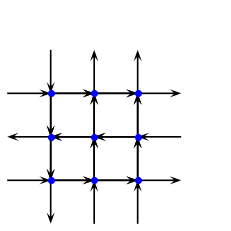

In [52]:
visualise_2d_model(l12)

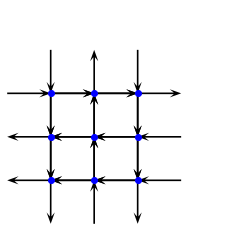

In [53]:
visualise_2d_model(flip_primary_diag(l12))

In [69]:
len(arr)

4

In [41]:
A = [[[0,-1],[1,-1]],[[2,1],[3,1]]]

A[0][0] , A[1][1] = A[1][1] , A[0][0]

A

[[[3, 1], [1, -1]], [[2, 1], [0, -1]]]

# Check for symmetric repititions

In [58]:
# #Updated function available in a later commit

# def remove_symmetries(str_dict):
#     for i in str_dict:
#         arr = string_to_arr(i)
#         ##Insert translations wale symmetries
#         #sdkfjgslkfdjglska#

#         #Check 90 degree rotation symmetry
#         name = ' '.join(map(str, rot90_anticlock(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check 180 degree rotation symmetry
#         name = ' '.join(map(str, rot180_anticlock(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check 270 degree rotation symmetry
#         name = ' '.join(map(str, rot270_anticlock(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check horizontal flip symmetry
#         name = ' '.join(map(str, hor_flip(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check vertical flip symmetry
#         name = ' '.join(map(str, ver_flip(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check secondary diagonal flip symmetry
#         name = ' '.join(map(str, flip_secondary_diag(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]

#         #Check primary diagonal flip symmetry
#         name = ' '.join(map(str, flip_primary_diag(arr).flatten())).replace(' ','')
#         if name in str_dict:
#             del str_dict[name]    

#     return str_dict

['a', 'b', 'c', 'd', 'e', 'f', 'g']

# Count unique states

In [21]:
lattice = []
unique_states = []
entropy = []
mean_steps = []
mean_steps_all = []
#Changes have been made to the functions - long_loop and count_states for the sake of making graph plotting easy. These changes have been marked.
#The lists defined above will be used for plotting.
#These lists have been passed into the function below.
#Every single run of the function below should generate one data point each and the data point will be appended to the above lists.
def count_unique_states(num,total_counts,lattice,unique_states,entropy,num_iters,return_dict = False,verbose=False):
    tot_states,state_dict,num_iters,num_iters_all = count_states(num,total_counts,return_dict=True)
    short_arrays = remove_symmetries(list(state_dict.keys()))
    unique_states.append(len(short_arrays))
    lattice.append(num)
    entropy.append(np.log(len(short_arrays)))
    mean_steps.append(np.mean(num_iters))
    mean_steps_all.append(np.mean(num_iters_all))
    

# Plotting functions

## Entropy vs Lattice size / number of Oxygen atoms


In [ ]:
def plot_entropy_vs_lattice_size(x,y):
    f = plt.plot(x,y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('Lattice size')
    plt.ylabel('Entropy per Kb (J K^(-1))')
    plt.title('Entropy')
    plt.show()
    

## Number of iterations needed to converge vs Lattice size

In [ ]:
def plot_iter_vs_lattice_size(x,y):
    f = plt.plot(x,y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('Lattice size')
    plt.ylabel('No. of iterations')
    plt.title('Convergence of the long loop algorithm')
    plt.show()
    

## Mean size of loop v/s lattice size

In [ ]:
def plot_states_vs_lattice_size(x,y):
    f = plt.plot(x,y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('Lattice size')
    plt.ylabel('Mean loop size')
    plt.title('Mean loop size')
    plt.show()


## No.of states v/s number of particles

In [ ]:
def plot_entropy_vs_lattice_size(x,y):
    f = plt.plot(x,y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('No. of particles')
    plt.ylabel('Number of states')
    plt.title('Number of states')
    plt.show()

## Correlation time vs lattice size

In [ ]:
def plot_entropy_vs_lattice_size(x,y):
    f = plt.plot(x,y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('Lattice size')
    plt.ylabel('Correlation time')
    plt.title('Correlation time')
    plt.show()